## Resolucion de un oscilador armonico cuantico ##

Metodo del disparo: Se consideran distintos valores para el autovalor,
y se resuelve el problema de condiciones iniciales desde uno de los extremos $(y0)$
para cada valor propuesto. Solo para los valores correctos del autovalor, el valor final
obtenido $(yN)$ coincidira, bajo una cierta tolerancia, con el valor impuesto por el
problema $y(L) = cte$.

A la hora de obtener las raices para obtener los autovalores es posible utilizar varios metodos. A continuacion se presenta dos formas posibles de obtener las raices y se discute cual nos da valores mas proximos al valor teorico $E=hw(n+\frac{1}{2})$.

Método de la Bisección

In [71]:
from numpy import zeros,pi,linspace,exp,sqrt,array,arange
from matplotlib.pyplot import plot,show,xlabel,ylabel,scatter,title,legend
{}
L=6
N=1000
h=2*L/(N-1) #el espacio entre puntos
E=[] #vecor en el que se guardan los autovalores
eps=1e-1

# función para le ecuación de Schrödinger

def f(r,x,E):
    psi=r[0]
    phi=r[1]
    fpsi=phi
    fphi=(x**2-E)*psi
    return array([fpsi,fphi],float)

# función que resuelve la ecuación de Schrödinger para una energía E.

def solve(E):
    r = array([0.0,E],float)
    for x in linspace(-L,L,N):
        k1=h*f(r,x,E)
        k2=h*f(r+0.5*k1,x+0.5*h,E)
        k3=h*f(r+0.5*k2,x+0.5*h,E)
        k4=h*f(r+k3,x+h,E)
        r+=(k1+2*k2+2*k3+k4)/6
    return r[0]

for i in range(10):
    #Sabemos que los autovalores son de la forma 2(n+1/2), por lo q vamos a dar valores iniciales cercanos a estos

    E0=2*(i+0.5)-0.1 #el valor a esperar menos 0.1
    E1=2*(i+0.5)+0.1 #el valor a esperar más 0.1

    solve0=solve(E0)
    solve1=solve(E1)

    while abs(solve1-solve0)>eps: 

        Ep = (E0+E1)/2
        solvep = solve(Ep)

        if solve0*solvep>0:
            E0,solve0 = Ep,solvep
            
        else:
            E1,solve1 = Ep,solvep         
    E.append((E0+E1)/2) #valores de las energias/autovalores
print("Las energias de los primeros 10 niveles son:")
print(E)

Las energias de los primeros 10 niveles son:
[1.0000000002168454, 3.000000003252614, 5.000000014099715, 7.000000038088182, 9.000000082375479, 11.000000175461173, 13.00000053346157, 15.000002741813658, 17.000016975402833, 19.00009536743164]


Método de la Secante

In [72]:
from numpy import array,arange

L=6  
eps=1e-10
autovalores=[]

# número de puntos y tamaño de cada intervalo
N=1000
h=2*L/(N-1) #el espacio entre puntos

# Función para el potencial

def V(x):
    return x**2

# función para le ecuación de Schrödinger

def f(r,x,E):
    
    psi=r[0]
    phi=r[1]
    fpsi=phi
    fphi=(V(x)-E)*psi

    return array([fpsi,fphi],float)

# función que resuelve la ecuación de Schrödinger para una energía E.

def solve(E):

    psi=0
    phi=1
    
    r=array([psi,phi],float)

    for x in arange(-L,L,h):
        
        k1=h*f(r,x,E)
        k2=h*f(r+0.5*k1,x+0.5*h,E)
        k3=h*f(r+0.5*k2,x+0.5*h,E)
        k4=h*f(r+k3,x+h,E)
        r+=(k1+2*k2+2*k3+k4)/6
        
    return r[0]

# Programa principal para encontrar la energía por el método de la secante
for i in range(10):
    E1=2*(i+0.5)-0.1 #el valor a esperar menos 0.1
    E2=2*(i+0.5)+0.1 #el valor a esperar más 0.1

    psi2=solve(E1)


    while abs(E1-E2)>eps:
        
        psi1,psi2=psi2,solve(E2)
        E1,E2=E2,E2-psi2*(E2-E1)/(psi2-psi1)
    autovalores.append(E2) #valores de las energias/autovalores

print("Las energias de los primeros 10 niveles son:")
print(autovalores)

Las energias de los primeros 10 niveles son:
[1.0000000002168603, 3.0000000032526652, 5.000000014100125, 7.00000003809984, 9.000000082550299, 11.0000001769138, 13.000000550169107, 15.000002894728631, 17.000017780410623, 19.00010067132885]


Con los dos metodos obtenemos valores muy similares a los teoricos y ambos tienen una buena precision.  A la vista de estos resultados daria igual cual de los dos metodos se utilice

**Calculo del espectro de los primeros niveles**

Tomando L = 6 voy a calcular el espectro y las autofunciones de los primeros 10 niveles y estudiare la dependencia con L 

A continuacion se van a obtener las 10 primeras autofunciones y energias para el caso de L=6

La energía del nivel 1 es: 1.0000000002168454
La energía del nivel 2 es: 3.000000003252614
La energía del nivel 3 es: 5.000000014099715
La energía del nivel 4 es: 7.000000038088182
La energía del nivel 5 es: 9.000000082375479
La energía del nivel 6 es: 11.000000175461173
La energía del nivel 7 es: 13.00000053346157
La energía del nivel 8 es: 15.000002741813658
La energía del nivel 9 es: 17.000016975402833
La energía del nivel 10 es: 19.00009536743164


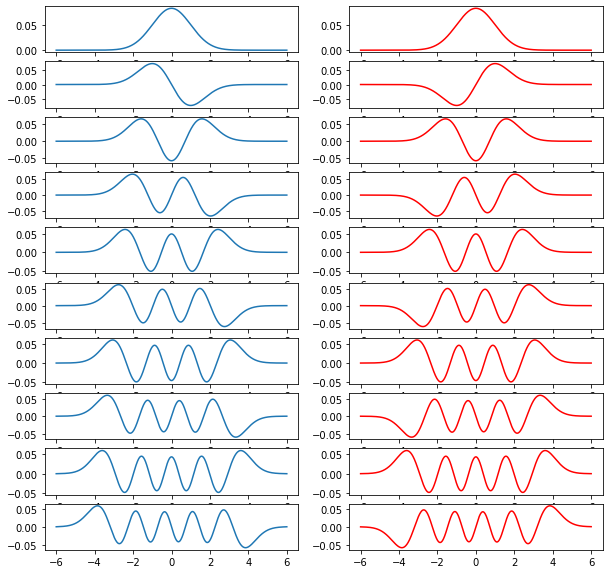

In [94]:
from numpy import zeros,pi,linspace,exp,sqrt,array,arange
from matplotlib.pyplot import plot,show,xlabel,ylabel,scatter,title,legend,subplots
from numpy.linalg import norm

fig,ax=subplots(10,2)
fig.set_size_inches(10,10)

L=6
N=1000
h=2*L/(N-1) #el espacio entre puntos
Energias=[] #vecotr donde ponga los autovalores con el método de bisección
eps=1e-1
puntos=linspace(-L,L,N)

# función para le ecuación de Schrödinger
def f(r,x,E):
    psi=r[0]
    phi=r[1]
    fpsi=phi
    fphi=(x**2-E)*psi
    return array([fpsi,fphi],float)

# función que resuelve la ecuación de Schrödinger para una energía E.
def solve(E):
    r = array([0.0,E],float)
    for x in puntos:
        k1=h*f(r,x,E)
        k2=h*f(r+0.5*k1,x+0.5*h,E)
        k3=h*f(r+0.5*k2,x+0.5*h,E)
        k4=h*f(r+k3,x+h,E)
        r+=(k1+2*k2+2*k3+k4)/6
    return r[0]

for i in range(10):
    #Sabemos que los autovalores son de la forma 2(n+1/2), por lo q vamos a dar valores iniciales cercanos a estos
    E0=2*(i+0.5)-0.1 #el valor a esperar menos 0.1
    E1=2*(i+0.5)+0.1 #el valor a esperar más 0.1

    solve0=solve(E0)
    solve1=solve(E1)

    while abs(solve1-solve0)>eps: 

        Ep = (E0+E1)/2
        solvep = solve(Ep)

        if solve0*solvep>0:
            E0,solve0 = Ep,solvep
            
        else:
            E1,solve1 = Ep,solvep         

    Energias.append((E0+E1)/2) #valores de las energias/autovalores
    print("La energía del nivel",i+1,"es:",Energias[i])

    #Obtencion de los autovalores
    
    psi=[] #Donde se van guardando cada punto de la autofuncion
    r=array([0,Energias[i]],float)

    for x in puntos:
        psi.append(r[0])
        k1 = h*f(r,x,Energias[i])
        k2 = h*f(r+0.5*k1,x+0.5*h,Energias[i])
        k3 = h*f(r+0.5*k2,x+0.5*h,Energias[i])
        k4 = h*f(r+k3,x+h,Energias[i])
        r += (k1+2*k2+2*k3+k4)/6  
        
    modulo=norm(psi) #para normalizar

    ax[i,0].plot(puntos,psi/modulo) #normalizamos

from numpy import zeros,pi,linspace,exp,sqrt,array,arange
from numpy.linalg import norm
from matplotlib.pyplot import plot,show,xlabel,ylabel,scatter,title,legend
L=6
N=1000
x=linspace(-L,L,N)
def phis(x):#autofunciones
    H=zeros((10,N))
    phi=zeros((10,N))
    for i in range(2,10):#cogemos 11 porque luego la autofuncion empieza para n=1
        H[0,:]=1
        H[1,:]=2*x
        H[i,:]=2*x*H[i-1,:]-2*(i-1)*H[i-2,:]
    for i in range(10):
        for j in range(N):
            phi[i,j]=H[i,j]*exp(-x[j]**2/2)
        modulo=norm(phi[i])
        ax[i,1].plot(x,phi[i,:]/modulo,"r")
phis(x)

A la izquierda se muestra el resultado obtenido de forma experimental y a la derecha el obtenido gracias a los polinomios de hermite (teoricamente), se puede observar como ambos resultados son iguales. En los gráficas de filas pares se puede ver como las gráficas están invertidas una con respecto a la otra, esto se debe a que hay un desfase.

Ahora se van a obtener las autofunciones para $L=3$ $L=4.5$ y $L=6$

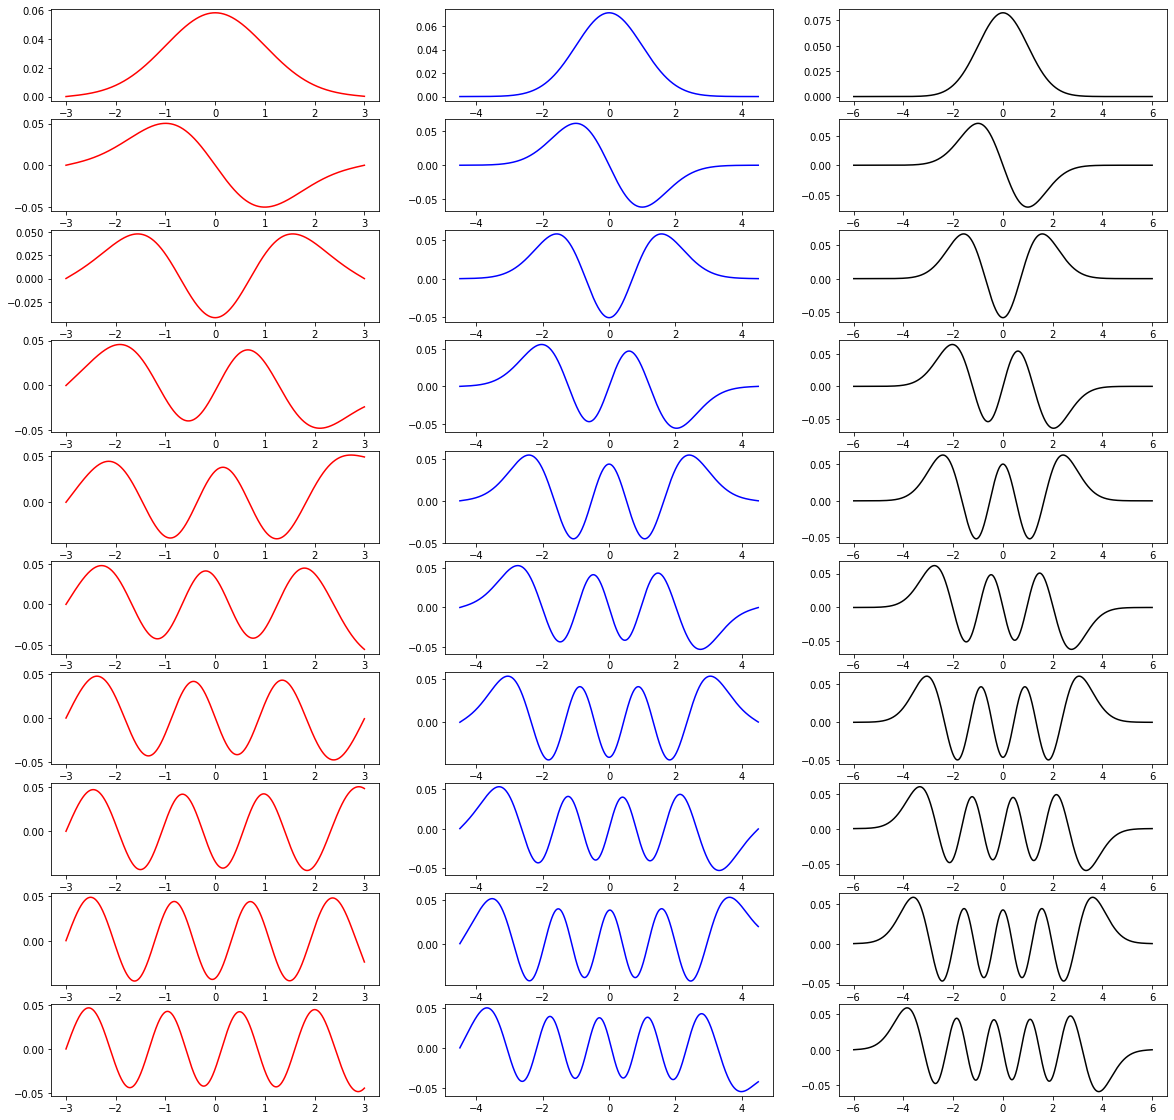

In [95]:
from numpy import zeros,pi,linspace,exp,sqrt,array,arange
from matplotlib.pyplot import plot,show,xlabel,ylabel,scatter,title,legend,subplots
from numpy.linalg import norm



fig,ax=subplots(10,3)
fig.set_size_inches(20,20)
#fig.suptitle('Autofunciones para diferentes valores de L',fontsize=18)

L=[3,4.5,6]


for j in range(len(L)):
    N=1000
    Energias=[] #vecotr donde ponga los autovalores con el método de bisección
    h=2*L[j]/(N-1) #el espacio entre puntos
    eps=1e-1
    puntos=linspace(-L[j],L[j],N)

    # función para le ecuación de Schrödinger
    def f(r,x,E):
        psi=r[0]
        phi=r[1]
        fpsi=phi
        fphi=(x**2-E)*psi
        return array([fpsi,fphi],float)

    # función que resuelve la ecuación de Schrödinger para una energía E.
    def solve(E):
        r = array([0.0,E],float)
        for x in puntos:
            k1=h*f(r,x,E)
            k2=h*f(r+0.5*k1,x+0.5*h,E)
            k3=h*f(r+0.5*k2,x+0.5*h,E)
            k4=h*f(r+k3,x+h,E)
            r+=(k1+2*k2+2*k3+k4)/6
        return r[0]

    for i in range(10):
        #Sabemos que los autovalores son de la forma 2(n+1/2), por lo q vamos a dar valores iniciales cercanos a estos
        E0=2*(i+0.5)-0.1 #el valor a esperar menos 0.1
        E1=2*(i+0.5)+0.1 #el valor a esperar más 0.1

        solve0=solve(E0)
        solve1=solve(E1)

        while abs(solve1-solve0)>eps: 

            Ep = (E0+E1)/2
            solvep = solve(Ep)

            if solve0*solvep>0:
                E0,solve0 = Ep,solvep
                
            else:
                E1,solve1 = Ep,solvep         

        Energias.append((E0+E1)/2) #me meto todos en un vector
        psi=[] #voy a ir metiendo los puntos de la autofunción
        r=array([0,Energias[i]],float)

        for x in puntos:
            psi.append(r[0])
            k1 = h*f(r,x,Energias[i])
            k2 = h*f(r+0.5*k1,x+0.5*h,Energias[i])
            k3 = h*f(r+0.5*k2,x+0.5*h,Energias[i])
            k4 = h*f(r+k3,x+h,Energias[i])
            r += (k1+2*k2+2*k3+k4)/6  
            
        modulo=norm(psi) #para normalizar

        if j==0:
            ax[i,j].plot(puntos,psi/modulo,"r") #normalizamos
        if j==1:
            ax[i,j].plot(puntos,psi/modulo,"b") #normalizamos
        if j==2:
            ax[i,j].plot(puntos,psi/modulo,"k") #normalizamos

A medida que se aumenta el tamaño de la caja las autofunciones se van estrechando

**Potencial armonico perturbado**

Voy a resolver el problema de autovalores para el siguiente potencial perturbado:

$V (x) = \frac{1}{2}kx^2 + λx^4$

Donde $λ < 1$. 
Teoricamente el resultado es:

$E0(\lambda) = 1 + \frac{3}{4}\lambda-\frac{21}{16}\lambda^2+...$

In [75]:
from numpy import linspace,array
L=6
N=1000
h=2*L/(N-1) #el espacio entre puntos #vecotr donde ponga los autovalores con el método de bisección
eps=1e-3
landa=0.1

# función para le ecuación de Schrödinger
def f(r,x,E):
    psi=r[0]
    phi=r[1]
    fpsi=phi
    fphi=(x**2+landa*x**4-E)*psi
    return array([fpsi,fphi],float)

# función que resuelve la ecuación de Schrödinger para una energía E.
def solve(E):
    r = array([0.0,E],float)
    for x in linspace(-L,L,N):
        k1=h*f(r,x,E)
        k2=h*f(r+0.5*k1,x+0.5*h,E)
        k3=h*f(r+0.5*k2,x+0.5*h,E)
        k4=h*f(r+k3,x+h,E)
        r+=(k1+2*k2+2*k3+k4)/6
    return r[0]

    #Sabemos que los autovalores son de la forma 2(n+1/2), por lo q vamos a dar valores iniciales cercanos a estos
E0=2*(0.5)-0.1 #el valor a esperar menos 0.1
E1=2*(0.5)+0.1 #el valor a esperar más 0.1

solve0=solve(E0)
solve1=solve(E1)
it=0
while abs(solve1-solve0)>eps: 
    if it>500:
        break
    it+=1
    Ep = (E0+E1)/2
    solvep = solve(Ep)

    if solve0*solvep>0:
        E0,solve0 = Ep,solvep
            
    else:
        E1,solve1 = Ep,solvep         
Eo=(E0+E1)/2 #me meto todos en un vector
Eo_teorico=1+3*landa/4-21*landa**2/16
print("El valor experimental de la energia fundamental es:",Eo)
print("El valor teorico (aproximado) de la energia fundamental es:",Eo_teorico)

El valor experimental de la energia fundamental es: 1.0652855097579357
El valor teorico (aproximado) de la energia fundamental es: 1.061875


El resultado obtenido experimental se asemeja al valor teorico. Los resultados teorico y experimental podrian ser mas parecidos si en el caso del valor teorico se utilizasen mas terminos del polinomio para su calculo.

# Ejecicio 3.

**Apartados 1 y 2**

Escribid un programa que calcule las  ́orbitas de los planetas a partir de las condicionesiniciales y los datos de la siguiente tabla. Comprobad que las  ́orbitas son cerradas, que se cumple la tercera ley de Kepler $\frac{T2}{a^3}=cte$,  dondeTes  el  periodo  orbital,  y  la  conservaci ́on  de  la  energ ́ıa.  Comprobad  que  secumple el Teorema del virial que relaciona la energ ́ıa cin ́etica y potencial:$〈T〉=−\frac{〈V〉}{2} $ ,siendo $〈·〉$ el promedio temporal en una  ́orbita yTyVla energ ́ıa cin ́etica y potencialrespectivamente.

Mercurio
E inicial: -2.7474861754831024e+32 [J]
E final: -2.7474861754833143e+32 [J]
Diferencia de energías es 7.710660325133674e-12 %
<T>= 2.747389009053958e+32 [J]
-<V>/2= 2.747437531022122e+32 [J]
Diferencia de energías promeido es 0.0017661120432627352 %
Constante de Kepler: 1.0002075388745106



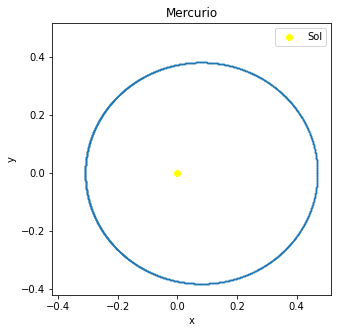

Venus
E inicial: -3.038452593372806e+33 [J]
E final: -3.038452593373036e+33 [J]
Diferencia de energías es 7.56990056947862e-12 %
<T>= 3.038444306637602e+33 [J]
-<V>/2= 3.0384484499236727e+33 [J]
Diferencia de energías promeido es 0.00013636208706933325 %
Constante de Kepler: 1.0003924706448837



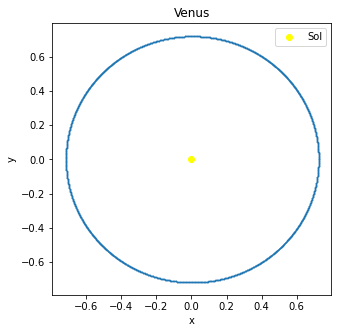

Tierra
E inicial: -2.678799021096025e+33 [J]
E final: -2.6787990210963053e+33 [J]
Diferencia de energías es 1.0458415260463883e-11 %
<T>= 2.67879159722804e+33 [J]
-<V>/2= 2.6787953087004963e+33 [J]
Diferencia de energías promeido es 0.00013855025004254416 %
Constante de Kepler: 1.0001658500939887



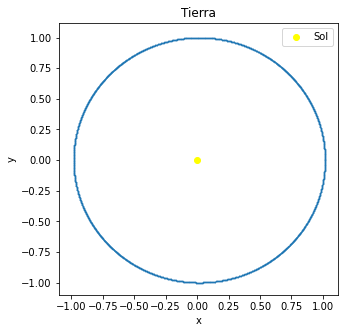

Marte
E inicial: -1.9386045547405447e+32 [J]
E final: -1.9386045547408117e+32 [J]
Diferencia de energías es 1.3771420543590629e-11 %
<T>= 1.9386008513289724e+32 [J]
-<V>/2= 1.938602691664728e+32 [J]
Diferencia de energías promeido es 9.493113315415416e-05 %
Constante de Kepler: 1.0000227039962588



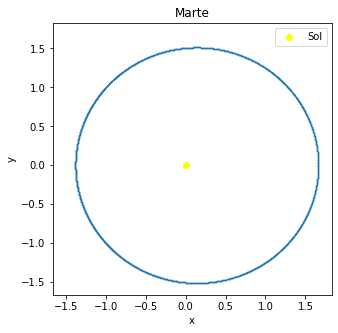

Júpiter
E inicial: -1.6313199166930923e+35 [J]
E final: -1.6313199166935577e+35 [J]
Diferencia de energías es 2.8529741359569997e-11 %
<T>= 1.6313088820349695e+35 [J]
-<V>/2= 1.6313143959520753e+35 [J]
Diferencia de energías promeido es 0.0003380057061241142 %
Constante de Kepler: 1.000147870129421



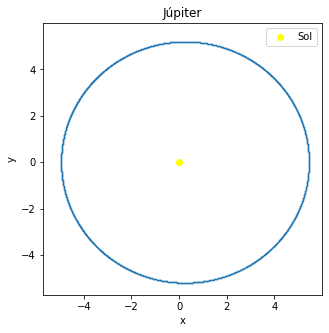

Saturno
E inicial: -2.667567159372352e+34 [J]
E final: -2.66756715937344e+34 [J]
Diferencia de energías es 4.078235586027346e-11 %
<T>= 2.667468661672935e+34 [J]
-<V>/2= 2.6675179016630436e+34 [J]
Diferencia de energías promeido es 0.00184594446473469 %
Constante de Kepler: 1.0006968804769243



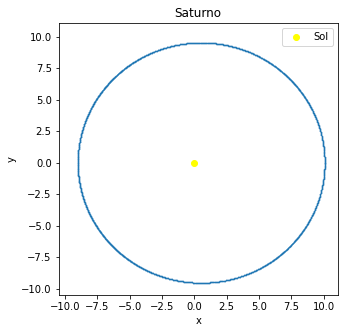

Urano
E inicial: -2.0473711469207067e+33 [J]
E final: -2.0473711469220014e+33 [J]
Diferencia de energías es 6.323869766460245e-11 %
<T>= 2.0473185948404847e+33 [J]
-<V>/2= 2.047344865428963e+33 [J]
Diferencia de energías promeido es 0.0012831705111498743 %
Constante de Kepler: 1.0005841493002825



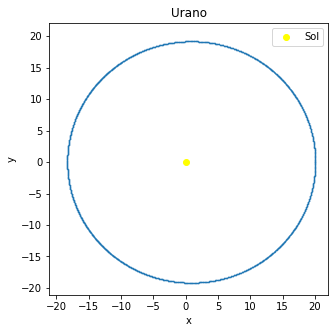

Neptuno
E inicial: -1.5298087113156496e+33 [J]
E final: -1.5298087113169167e+33 [J]
Diferencia de energías es 8.282478222216691e-11 %
<T>= 1.5297976982734544e+33 [J]
-<V>/2= 1.5298032045805357e+33 [J]
Diferencia de energías promeido es 0.00035993694379265394 %
Constante de Kepler: 1.0007275491383603



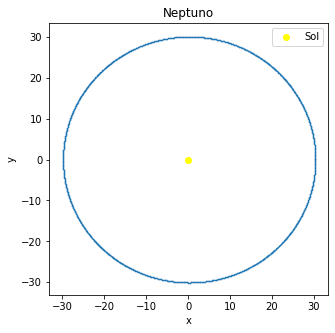

Plutón
E inicial: -1.4682682888206566e+29 [J]
E final: -1.4682682888223628e+29 [J]
Diferencia de energías es 1.1620942422031167e-10 %
<T>= 1.4682468065328811e+29 [J]
-<V>/2= 1.4682573902428953e+29 [J]
Diferencia de energías promeido es 0.000720839981884162 %
Constante de Kepler: 1.0000754845107385



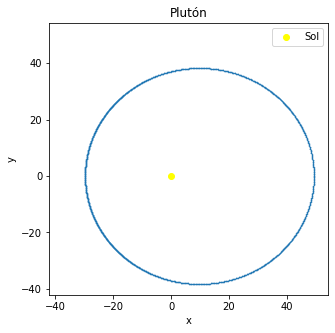

In [6]:
from numpy import sin,cos,array,linspace,pi,sqrt,copy,shape,arctan,amin,amax
from matplotlib.pyplot import plot,show,xlabel,ylabel,scatter,title,legend,figure,xlim,ylim

#valores de los planetas
valores=array([['Mercurio',2.4e23,0.39,0.206],['Venus',4.9e24,0.72,0.007],['Tierra',6e24,1,0.017],['Marte',6.6e23,1.52,0.093],['Júpiter',1.9e27,5.2,0.048],['Saturno',5.7e26,9.54,0.056],['Urano',8.8e25,19.19,0.046],['Neptuno',1.03e26,30.06,0.01],['Plutón',1.3e22,39.53,0.248]])
filas, columnas = shape(valores)

# constantes del sistema
GM=4*pi**2

# definimos nuestro intervalo y el paso
h=1e-4
delta=1e-14 #cuanto menor sea mas pasos va a dar (más pequeños) y mas precisión

# definimos nuestra función vectorial, vamos a diferenciar entre f1 y f2 para poder trabajar con el Runge-Kutta de paso adaptado
#en f cogemos los valores de r y en f2 los cogemos de r2
def f(r): 
    x=r[0] #los pongo pero la x y la y no sirven porque no estan en la integral 
    y=r[1]
    xvel=r[2]
    yvel=r[3]

    fx=xvel
    fy=yvel
    erre=sqrt(x**2+y**2)

    fxvel=-GM*x/erre**3
    fyvel=-GM*y/erre**3

    return array([fx,fy,fxvel,fyvel],float)

def f2(r2): 
    x=r2[0] #los pongo pero la x y la y no sirven porque no estan en la integral 
    y=r2[1]
    xvel=r2[2]
    yvel=r2[3]

    fx=xvel
    fy=yvel
    erre=sqrt(x**2+y**2)
    fxvel=-GM*x/erre**3
    fyvel=-GM*y/erre**3

    return array([fx,fy,fxvel,fyvel],float)

# inicializamos nuestras arrays


for i in range(filas):
    #vamos a ir metiendo los valores al integrar en los siguientes vectores
    xp=[]
    yp=[]
    xvelp=[]
    yvelp=[]

    t=0 #partimos de t=0 y vamos a ir sumando el tiempor por cada paso
    vueltas=0 #gracias a q vamos a contar el número de vueltas vamos a poder parar el código en la primera vuelta y q no corra infinitamente
    T=0 #para sacar la energia cinetica en cada paso
    V=0 #para sacar la energia potencial en cada caso

    # fijamos las condiciones iniciales
    v1=sqrt(GM*(1-float(valores[i][3]))/((float(valores[i][2])*(1+float(valores[i][3])))))

    r=array([float(valores[i][2])*float(valores[i][3])+float(valores[i][2]),0,0,v1],float)#valor incial de x y la vel
    r2=array([float(valores[i][2])*float(valores[i][3])+float(valores[i][2]),0,0,v1],float)#este lo uso para hacer los de 2h

    #me meto ya los primeros valores para luego graficar
    xp.append(r2[0])
    yp.append(r2[1])
    xvelp.append(r2[2])
    yvelp.append(r2[3])

    print(valores[i][0]) #imprimimos el nombre del planeta
    Einic=((1.5e11/3.154e7)**2)*(0.5*float(valores[i][1])*v1**2-GM*float(valores[i][1])/(float(valores[i][2])+float(valores[i][2])*float(valores[i][3])))
    print('E inicial:', Einic,"[J]")#calculamos la energía total incial, se multiplica por 231.822 para pasar a julios
    

    while True:     
        r0=copy(r) #esto me va a servir para cuando se de que rho<1, para tener guardado el r antes de las iteraciones y volver a ese mismo valor

        for j in range(2): #hago h y luego h
            k1=h*f(r)
            k2=h*f(r+0.5*k1)
            k3=h*f(r+0.5*k2)
            k4=h*f(r+k3)

            r+=(k1+2*k2+2*k3+k4)/6 #voy a conseguir el valor despues de hacer dos veces h
    
        #ahora directamente usamos paso=2h
        k1_2=2*h*f2(r2)
        k2_2=2*h*f2(r2+0.5*k1_2)
        k3_2=2*h*f2(r2+0.5*k2_2)
        k4_2=2*h*f2(r2+k3_2)
    
        r2+=(k1_2+2*k2_2+2*k3_2+k4_2)/6

        rho=30*h*delta/sqrt(((r[0]-r2[0])/30)**2+((r[1]-r2[1])/30)**2) #condición de convergencia

        if rho>1: #utilizamos el 2h (nuestra precisión es mayor que el objetivo) en este caso avanzamos
            #introducimos los valores en nuestros vectores
            xp.append(r2[0]) 
            yp.append(r2[1])
            xvelp.append(r2[2])
            yvelp.append(r2[3])

            t+=2*h #sumamos el tiempo del paso 2h
            #Calculamos V y T medio en ese intervalo de tiempo y lo multiplicamos por el paso que hemos dado (luego dividiremos entre el total del tiempo dando el promedio de ambos)
            #de momento no pasamos a unidades de julios, pasamos en el último paso
            V+=2*h*GM*float(valores[i][1])/(0.5*(sqrt(xp[-1]**2+yp[-1]**2)+sqrt(xp[-2]**2+yp[-2]**2))) #coge el r medio entre los valores para tener menos error 
            T+=2*h*0.5*float(valores[i][1])*(0.5*(sqrt(xvelp[-1]**2+yvelp[-1]**2)+sqrt(xvelp[-2]**2+yvelp[-2]**2)))**2 #igual q antes, cojo v medio

            h=h*rho**(1/4)
            r=copy(r2) #le decimos que r es los valores de r2 para que empiece en la prox iteración desde ahí 
            
            if yp[-1]>0 and yp[-2]<0: #condición de acabar vuelta (y pasa de negativa a positiva)
                vueltas+=1
                if vueltas>1: #tras una vuelta calculamos E final y sabiendo ya el periodo de la órbita (el t al que hemos ido sumando 2*h) podemos sacar el promedio de las energías
                    Efin=((1.5e11/3.154e7)**2)*(0.5*float(valores[i][1])*(xvelp[-1]**2+yvelp[-1]**2)-GM*float(valores[i][1])/sqrt(xp[-1]**2+yp[-1]**2))
                    print('E final:',Efin,"[J]")
                    print("Diferencia de energías es",(Efin-Einic)*100/Einic,"%" )
                    Tprom=((1.5e11/3.154e7)**2)*T/t
                    Vprom=((1.5e11/3.154e7)**2)*V/(2*t)
                    print('<T>=',Tprom,"[J]")
                    print('-<V>/2=',Vprom,"[J]")
                    print("Diferencia de energías promeido es",abs(Tprom-Vprom)*100/Tprom,"%" )
                    break

        else: #en este caso volvemos al punto de partida con otra h más pequeña
            h=h*rho**(1/4)
            r=copy(r0)
            r2=copy(r0)


    figure(figsize=(5,5))   
    print('Constante de Kepler:',(t/vueltas)**2/(float(valores[i][2]))**3)
    scatter(0,0,c="yellow",label="Sol")
    scatter(xp,yp,s=0.1)
    
    #estas cuatro lineas las hemos hecho para que el eje de las x tenga el mismo rango de medidas q el de las y, en consecuencia ver la imagen tal y como se da en la realidad (sin deformaciones debidas al rango de los ejes)
    limmin=amin([amin(xp),amin(yp)])
    limmas=amax([amax(xp),amax(yp)])
    xlim(limmin+0.1*limmin,limmas+0.1*limmas)
    ylim(limmin+0.1*limmin,limmas+0.1*limmas)

    title(valores[i][0])
    legend()
    xlabel("x")
    ylabel("y")
    print()
    show()


Podemos ver como para todos nuestros planetas el valor de la energía total inicial y final se conserva (el error es muy bajo), se cumple el Teorema del virial y la constante de Kepler es muy cercana a 1. La órbita es cerrada tal y como se puede apreciar en  las gráficas

**Apartado 3**

Modificad la fuerza de Newton incluyendo la primera correcci ́on de la Relatividad General(para Mercurio). dondeMes la masa de Mercurio y c= 63241 UA/año es la velocidad de la luz. Comprobadque estas correcciones producen que la  ́orbita no se cierre, y por tanto, el perihelio avanzacon cada vuelta. El ritmo de avance de este angulo  ́$θ′(t)$ puede determinarse calculando loque avanza por cada vuelta el perihelio. Sin embargo, dado que este efecto es proporcionala $c^{−2}$ , para obtener una estimaci ́on es recomendable tomar valores dec'100−1000 ycalculad para cada uno de ellos el avance del perihelio por vuelta. A partir de estos datosextrapolar el valor real $('43′′/siglo)$

Giro [''/siglo]: 43.052945451138235


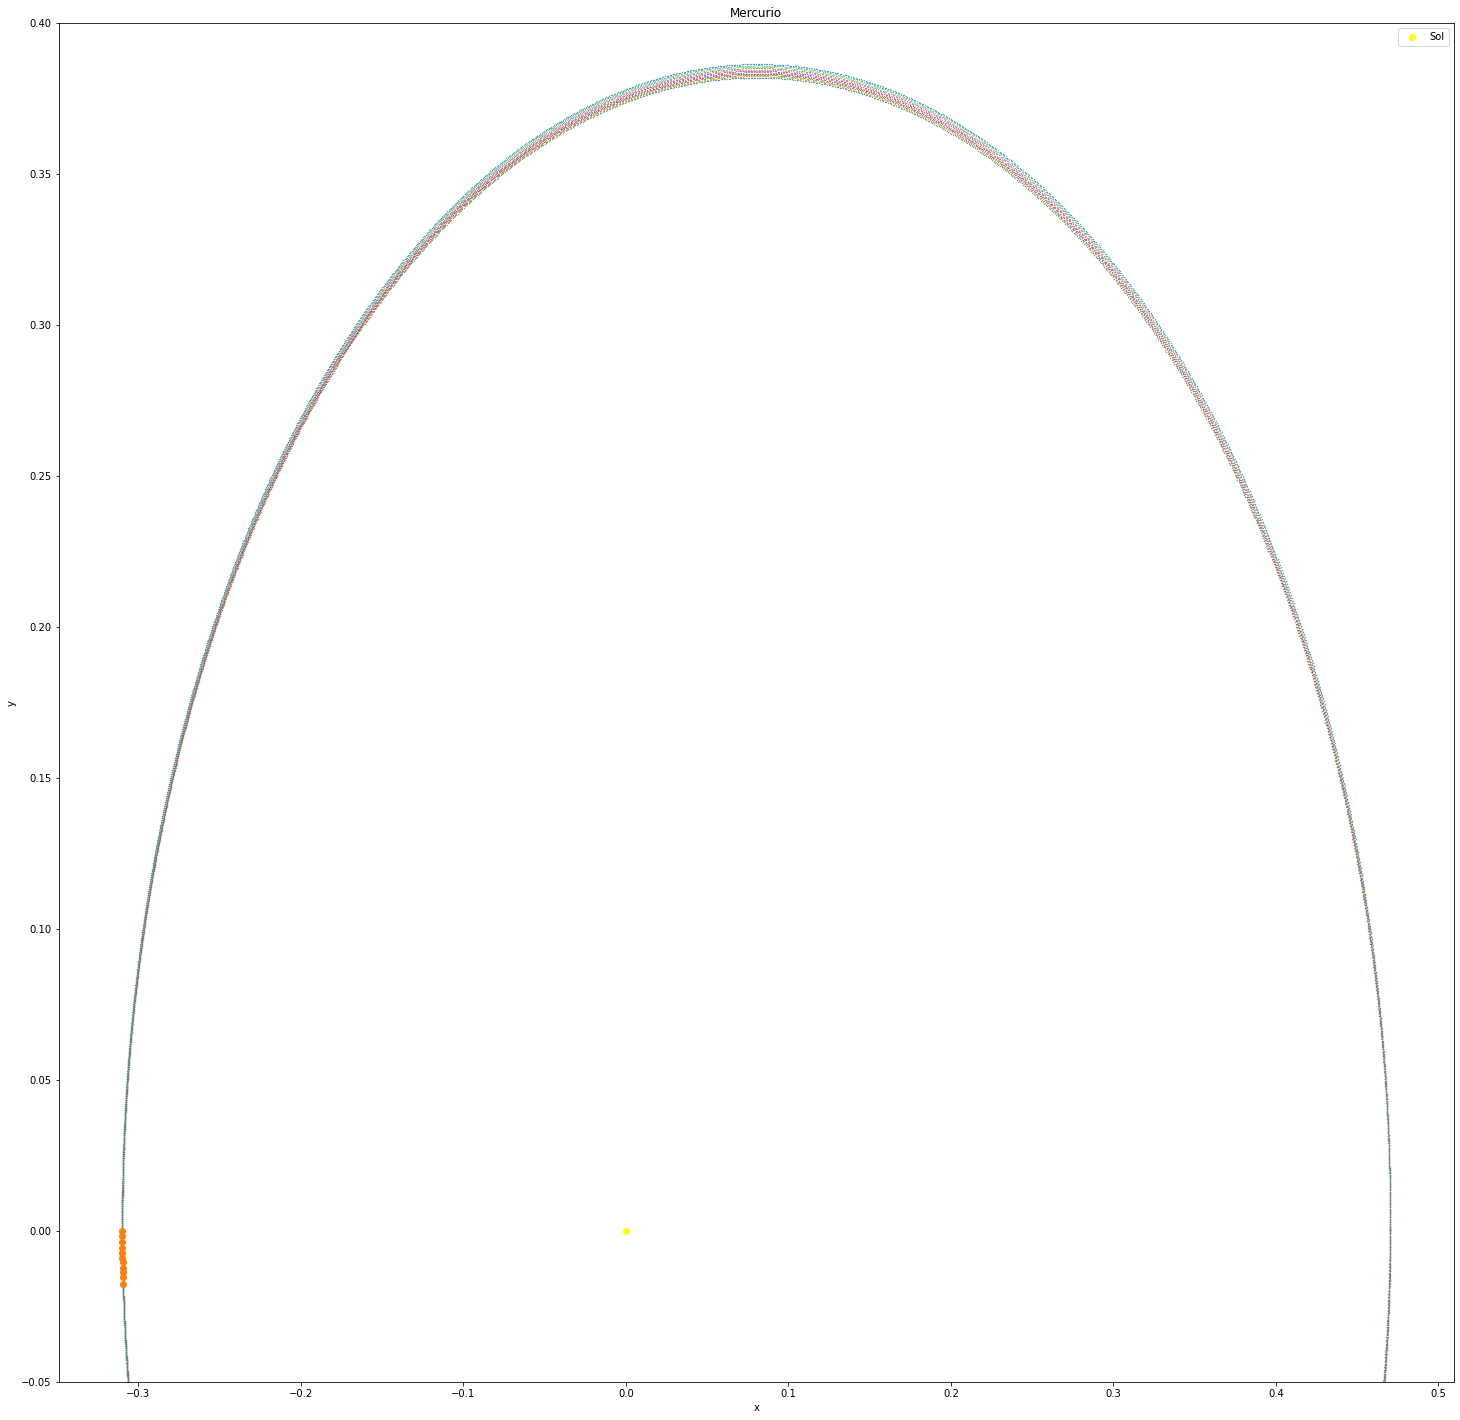

In [77]:
from numpy import sin,cos,array,linspace,pi,sqrt,copy,shape,arctan,amin,amax,arctan,mean,argmin
from matplotlib.pyplot import plot,show,xlabel,ylabel,scatter,title,legend,figure,xlim,ylim

#valores de los planetas

valores=array([['Mercurio',2.4e23,0.39,0.206],['Venus',4.9e24,0.72,0.007],['Tierra',6e24,1,0.017],['Marte',6.6e23,1.52,0.093],['Júpiter',1.9e27,5.2,0.048],['Saturno',5.7e26,9.54,0.056],['Urano',8.8e25,19.19,0.046],['Neptuno',1.03e26,30.06,0.01],['Plutón',1.3e22,39.53,0.248]])
filas, columnas = shape(valores)

# constantes del sistema
GM=4*pi**2
c=600
# definimos nuestro intervalo y el paso
h=1e-5
delta=0.5e-14 #cuanto menor sea mas pasos va a dar (más pequeños) y mas precisión

# definimos nuestra función vectorial, vamos a diferenciar entre f1 y f2 para poder trabajar con el Runge-Kutta de paso adaptado
#en f cogemos los valores de r y en f2 los cogemos de r2
def f(r): 
    x=r[0] #los pongo pero la x y la y no sirven porque no estan en la integral 
    y=r[1]
    xvel=r[2]
    yvel=r[3]

    fx=xvel
    fy=yvel
    erre=sqrt(x**2+y**2)
    v=sqrt(xvel**2+yvel**2)

    fxvel=-GM*((1-4*GM/(erre*c**2)+v**2/(c**2))*x-4*(xvel*x+y*yvel)*xvel/(c**2))/(erre**3)
    fyvel=-GM*((1-4*GM/(erre*c**2)+v**2/(c**2))*y-4*(xvel*x+y*yvel)*yvel/(c**2))/(erre**3)
    return array([fx,fy,fxvel,fyvel],float)

def f2(r2): 
    x=r2[0] #los pongo pero la x y la y no sirven porque no estan en la integral 
    y=r2[1]
    xvel=r2[2]
    yvel=r2[3]

    fx=xvel
    fy=yvel
    erre=sqrt(x**2+y**2)
    v=sqrt(xvel**2+yvel**2)

    fxvel=-GM*((1-4*GM/(erre*c**2)+v**2/(c**2))*x-4*(xvel*x+y*yvel)*xvel/(c**2))/(erre**3)
    fyvel=-GM*((1-4*GM/(erre*c**2)+v**2/(c**2))*y-4*(xvel*x+y*yvel)*yvel/(c**2))/(erre**3)

    return array([fx,fy,fxvel,fyvel],float)

# inicializamos nuestras arrays


for i in range(1):
    #vamos a ir metiendo los valores al integrar en los siguientes vectores
    xp=[]
    yp=[]
    rp=[]
    xvelp=[]
    yvelp=[]

    figure(figsize=(25,25))

    semiejemayor=float(valores[i][2])*float(valores[i][3])+float(valores[i][2])
    x0=[] #voy a ir metiendo los valores en los q la órbita está en el semieje menor
    y0=[] # lo mismo pero con i
    t0=[0] #voy a ir metiendo los valores de tiempo para cada paso
    t=0 #aqui me voy a ir poniendo los tiempos
    vueltas=0

    # fijamos las condiciones iniciales
    v1=sqrt(GM*(1-float(valores[i][3]))/((float(valores[i][2])*(1+float(valores[i][3])))))

    r=array([semiejemayor,0,0,v1],float)#valor incial de x y la vel
    r2=array([semiejemayor,0,0,v1],float)#este lo uso para hacer los de 2h

    #me meto ya los primeros valores para luego graficar
    xp.append(r2[0])
    yp.append(r2[1])
    xvelp.append(r2[2])
    yvelp.append(r2[3])

    while True:     
        r0=copy(r) #esto me va a servir para cuando se de que rho<1, para tener guardado el r antes de las iteraciones y volver a ese mismo valor

        for j in range(2): #hago h y luego h
            k1=h*f(r)
            k2=h*f(r+0.5*k1)
            k3=h*f(r+0.5*k2)
            k4=h*f(r+k3)

            r+=(k1+2*k2+2*k3+k4)/6 #voy a conseguir el valor despues de hacer dos veces h
    
        #ahora directamente usamos paso=2h
        k1_2=2*h*f2(r2)
        k2_2=2*h*f2(r2+0.5*k1_2)
        k3_2=2*h*f2(r2+0.5*k2_2)
        k4_2=2*h*f2(r2+k3_2)
    
        r2+=(k1_2+2*k2_2+2*k3_2+k4_2)/6

        rho=30*h*delta/sqrt(((r[0]-r2[0])/30)**2+((r[1]-r2[1])/30)**2)

        if rho>1: #utilizamos el 2h (nuestra precisión es mayor que el objetivo) en este caso avanzamos
            #introducimos los valores en nuestros vectores
            xp.append(r2[0])
            yp.append(r2[1])
            rp.append(r2[0]**2+r2[1]**2)
            xvelp.append(r2[2])
            yvelp.append(r2[3])
        
            t+=2*h #sumamos el tiempo del paso 2h

            h=h*rho**(1/4)
            r=copy(r2) #le decimos que r es los valores de r2 para que empiece en la prox iteración desde ahí
            
            if yp[-1]>0 and yp[-2]<0: #condición de acabar vuelta (y pasa de negativa a positiva)
                scatter(xp,yp,s=0.1) #me dibujo la vuelta dada 
                vueltas+=1
                pos=argmin(rp) #me quedo con la posicion para la q el radio es menor
                x0.append(xp[pos]) #cojo la x y la y de esa posición
                y0.append(yp[pos])
                t0.append(t) #me meto el tiempo en el q se día ese valor de r minimo
                xp=[xp[-1]] #me quedo con los últimos valores de t para que el programa pueda seguir funcionando pero que en la próxima vuelta no me imprima la q ya está impresa
                yp=[yp[-1]]
                rp=[]

                if vueltas>10: #tomamos 10 vueltas para evitar errores.
                    break

        else: #en este caso volvemos al punto de partida con otra h más pequeña
            h=h*rho**(1/4)
            r=copy(r0)
            r2=copy(r0)

    ang=[arctan(y0[0]/x0[0])+pi] #el ángulo q forma el primer mínimo del radio (pi con respecto al eje positivo de x)
    giro=[] #me voy a ir metiendo la diferencia de valores de ang por vuelta

    for w in range(int(vueltas)-1): #para sacar el ángulo de la posición de minima distancia con respecto al eje x positivo
        ang.append(arctan(y0[w+1]/x0[w+1]))
        if y0[w+1]>0 and x0[w+1]<0:
            ang[-1]+=pi
        if y0[w+1]<0 and x0[w+1]<0:
            ang[-1]+=pi
        if y0[w+1]<0 and x0[w+1]>0:
            ang[-1]+=2*pi
        giro.append((ang[w+1]-ang[w])/(t0[w+1]-t0[w])) #hago la diferencia de ángulos y divido entre la diferencia de tiempos (saldrá en radianes/año)

    print( "Giro [''/siglo]:",100*mean(giro)*180*3600/(pi*(63241/c)**2))#sacamos el valor del giro por siglo (pasamos de años a siglos (*100), de radianes a grados y despues a segundos (180*3600/pi) y corregimos el factor de c^-2  *1/(63241/c)**2)
    scatter(x0,y0) #dibujamos los puntos en los q se encunetra el semieje menor para cada vuelta
    scatter(0,0,c="yellow",label="Sol")
    title(valores[i][0])
    legend()
    xlabel("x")
    ylabel("y")
    ylim(-0.05,0.4)
    show() 

En la gráfica podemos ver como la órbita no es cerrada (parte superior de la imagen), a su vez, podemos ver como el punto donde se encuentra en el semieje menor va cambiando para cada vuelta pues los puntos naranjas se van moviendo. (Solo se ha dibujado la parte superior de la órbita para que se pudiese ver con claridad que la órbita no era cerrada)